# LBF5x5-n2-f3-static-v2 Heuristic Meta Pi experiment analysis 

In [1]:
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents
import posggym_agents.exp.plot_utils as policy_plot_utils

import baposgmcp.plot as plot_utils
from baposgmcp.config import BASE_REPO_DIR

baposgmcp_results_file = osp.join(
    BASE_REPO_DIR, "experiments", "lbf", "LBF5x5-n2-f3-static-v2", "results", "heuristic_meta_pi_results.csv"
)
policy_results_file = osp.join(
    posggym_agents.config.BASE_DIR, 'agents', "lbf5x5_n2_f3_static_v2", "results", "heuristic_pairwise_results.csv"
)

## Loading Heuristic Policy Data

In [2]:
policy_df = plot_utils.import_results(
    policy_results_file, clean_policy_id=True
)
policy_df.columns

policy_ids = policy_df["policy_id"].unique().tolist()
policy_ids.sort()
print(policy_ids)

['heuristic1-v0', 'heuristic2-v0', 'heuristic3-v0', 'heuristic4-v0']


## Loading BAPOSGMCP Data

In [3]:
baposgmcp_df = plot_utils.import_results(
    baposgmcp_results_file, clean_policy_id=True
)
policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_pucb_greedy_6
   POMetaRollout_pucb_greedy_7
   POMetaRollout_pucb_softmax_6
   POMetaRollout_pucb_softmax_7
   POMetaRollout_pucb_uniform_6
   POMetaRollout_pucb_uniform_7
   POMeta_greedy_6
   POMeta_greedy_7
   POMeta_softmax_6
   POMeta_softmax_7
   POMeta_uniform_6
   POMeta_uniform_7
   baposgmcp_greedy_6
   baposgmcp_greedy_7
   baposgmcp_softmax_6
   baposgmcp_softmax_7
   baposgmcp_uniform_6
   baposgmcp_uniform_7
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0
   metabaseline_greedy
   metabaseline_softmax
   metabaseline_uniform

Columns
-------
   Unnamed: 0
   exp_id
   agent_id
   env_name
   exp_seed
   num_episodes
   time_limit
   episode_step_limit
   policy_id
   discount
   c_init
   c_base
   truncated
   action_selection
   dirichlet_alpha
   root_exploration_fraction
   known_bounds
   extra_particles_prop
   step_limit
   epsilon
   other_policy_dist
   meta_policy_dict
   num_sims
   search_time_mean
   sea

In [4]:
# some cleaning to fix small naming error with '__'
def fix_name(row):
    policy_id = row["policy_id"]
    if "__" in policy_id:
        policy_id = policy_id.replace("__", "_")
        last_token = policy_id.split("_")[-1]
        num_sims = ""
        for c in last_token:
            if c.isnumeric():
                num_sims += c
        policy_id = policy_id.replace(num_sims, f"_{num_sims}")
    return policy_id

baposgmcp_df["policy_id"] = baposgmcp_df.apply(fix_name, axis=1)
policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

Policies
--------
   POMetaRollout_pucb_greedy_6
   POMetaRollout_pucb_greedy_7
   POMetaRollout_pucb_softmax_6
   POMetaRollout_pucb_softmax_7
   POMetaRollout_pucb_uniform_6
   POMetaRollout_pucb_uniform_7
   POMeta_greedy_6
   POMeta_greedy_7
   POMeta_softmax_6
   POMeta_softmax_7
   POMeta_uniform_6
   POMeta_uniform_7
   baposgmcp_greedy_6
   baposgmcp_greedy_7
   baposgmcp_softmax_6
   baposgmcp_softmax_7
   baposgmcp_uniform_6
   baposgmcp_uniform_7
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0
   metabaseline_greedy
   metabaseline_softmax
   metabaseline_uniform


## Combine data

In [5]:
# First need to update exp_ids of one dataframe so there are no duplicate exp_ids
df1 = baposgmcp_df
df2 = policy_df

df1_max_exp_id = df1["exp_id"].max()
if df2["exp_id"].min() <= df1_max_exp_id:
    df2["exp_id"] += df1_max_exp_id+1

combined_df = pd.concat([baposgmcp_df, policy_df]).reset_index(drop = True)
    
policy_ids = combined_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_pucb_greedy_6
   POMetaRollout_pucb_greedy_7
   POMetaRollout_pucb_softmax_6
   POMetaRollout_pucb_softmax_7
   POMetaRollout_pucb_uniform_6
   POMetaRollout_pucb_uniform_7
   POMeta_greedy_6
   POMeta_greedy_7
   POMeta_softmax_6
   POMeta_softmax_7
   POMeta_uniform_6
   POMeta_uniform_7
   baposgmcp_greedy_6
   baposgmcp_greedy_7
   baposgmcp_softmax_6
   baposgmcp_softmax_7
   baposgmcp_uniform_6
   baposgmcp_uniform_7
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0
   metabaseline_greedy
   metabaseline_softmax
   metabaseline_uniform

Columns
-------
   Unnamed: 0
   exp_id
   agent_id
   env_name
   exp_seed
   num_episodes
   time_limit
   episode_step_limit
   policy_id
   discount
   c_init
   c_base
   truncated
   action_selection
   dirichlet_alpha
   root_exploration_fraction
   known_bounds
   extra_particles_prop
   step_limit
   epsilon
   other_policy_dist
   meta_policy_dict
   num_sims
   search_time_mean
   sea

## Pairwise performance by number of simulations

Here we look at the performance of each policy against each other policy including BAPOSGMCP using different number of simulations.

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/ba-posgmcp/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


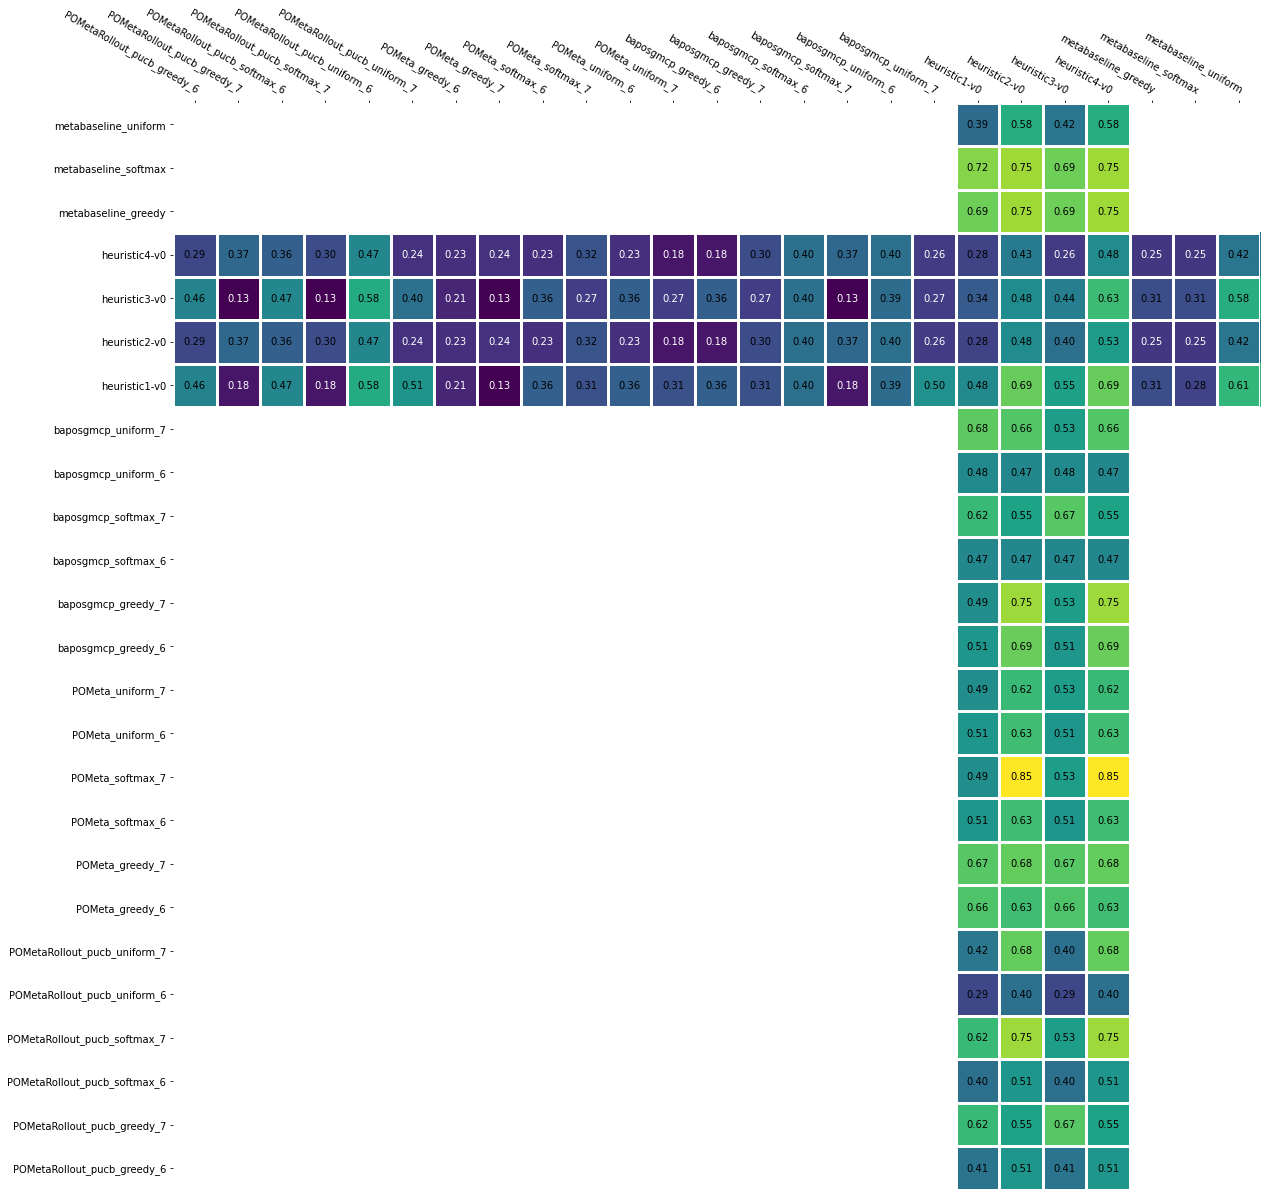

In [6]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_returns_mean", 
    policy_key="policy_id",
    y_err_key=None,   # See next plot
    vrange=None, 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

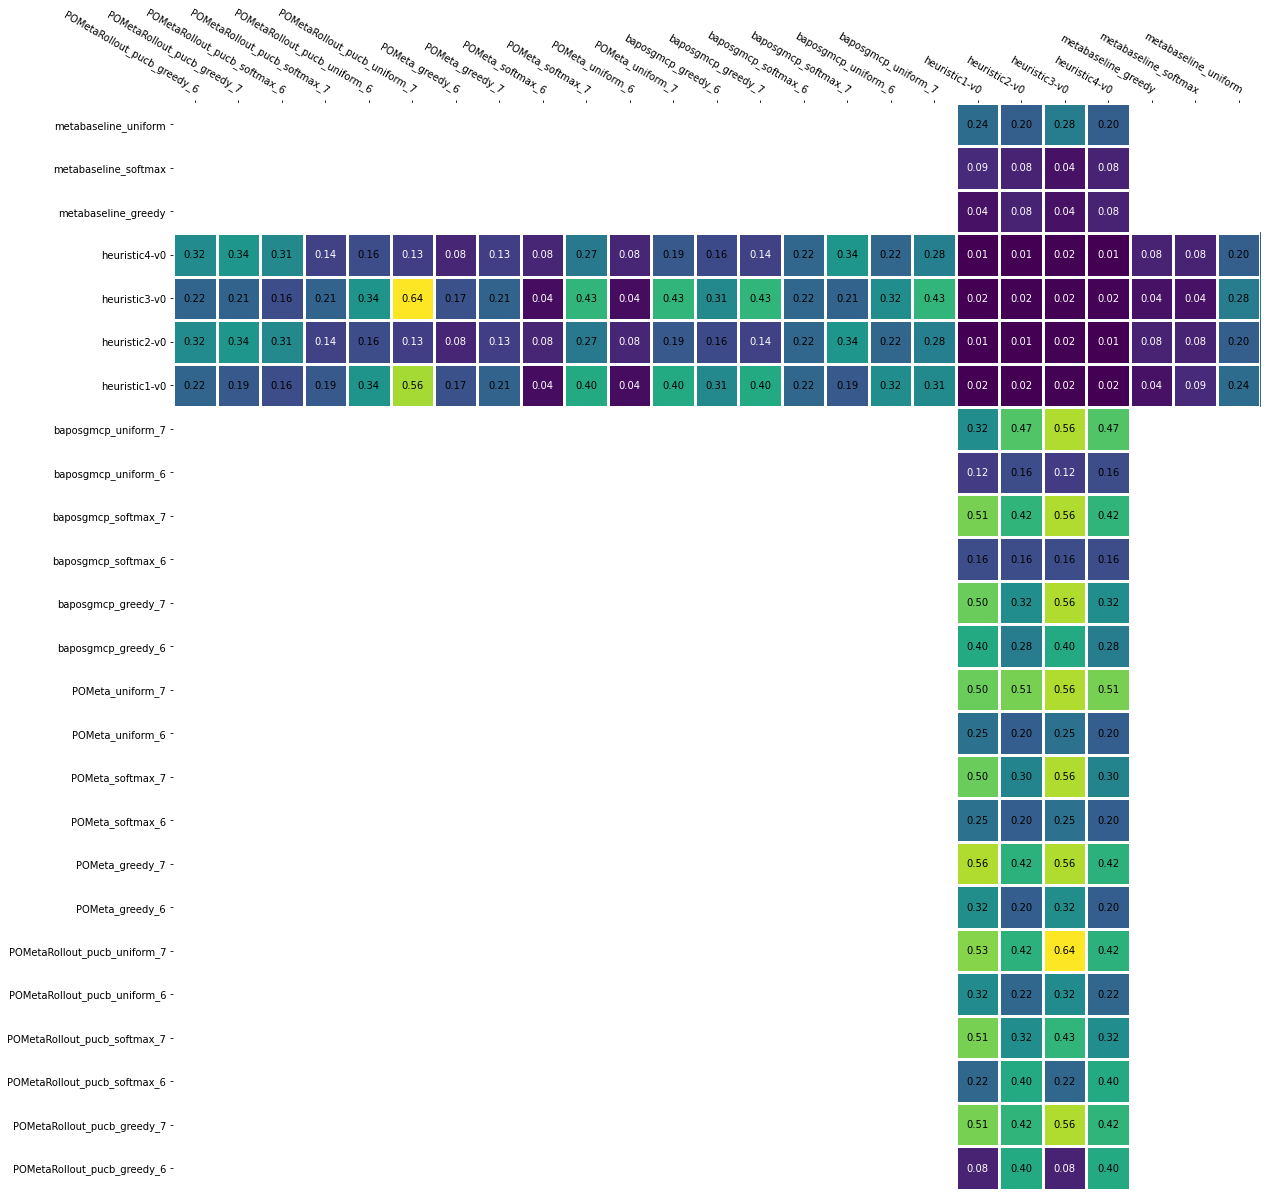

In [7]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_returns_CI", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

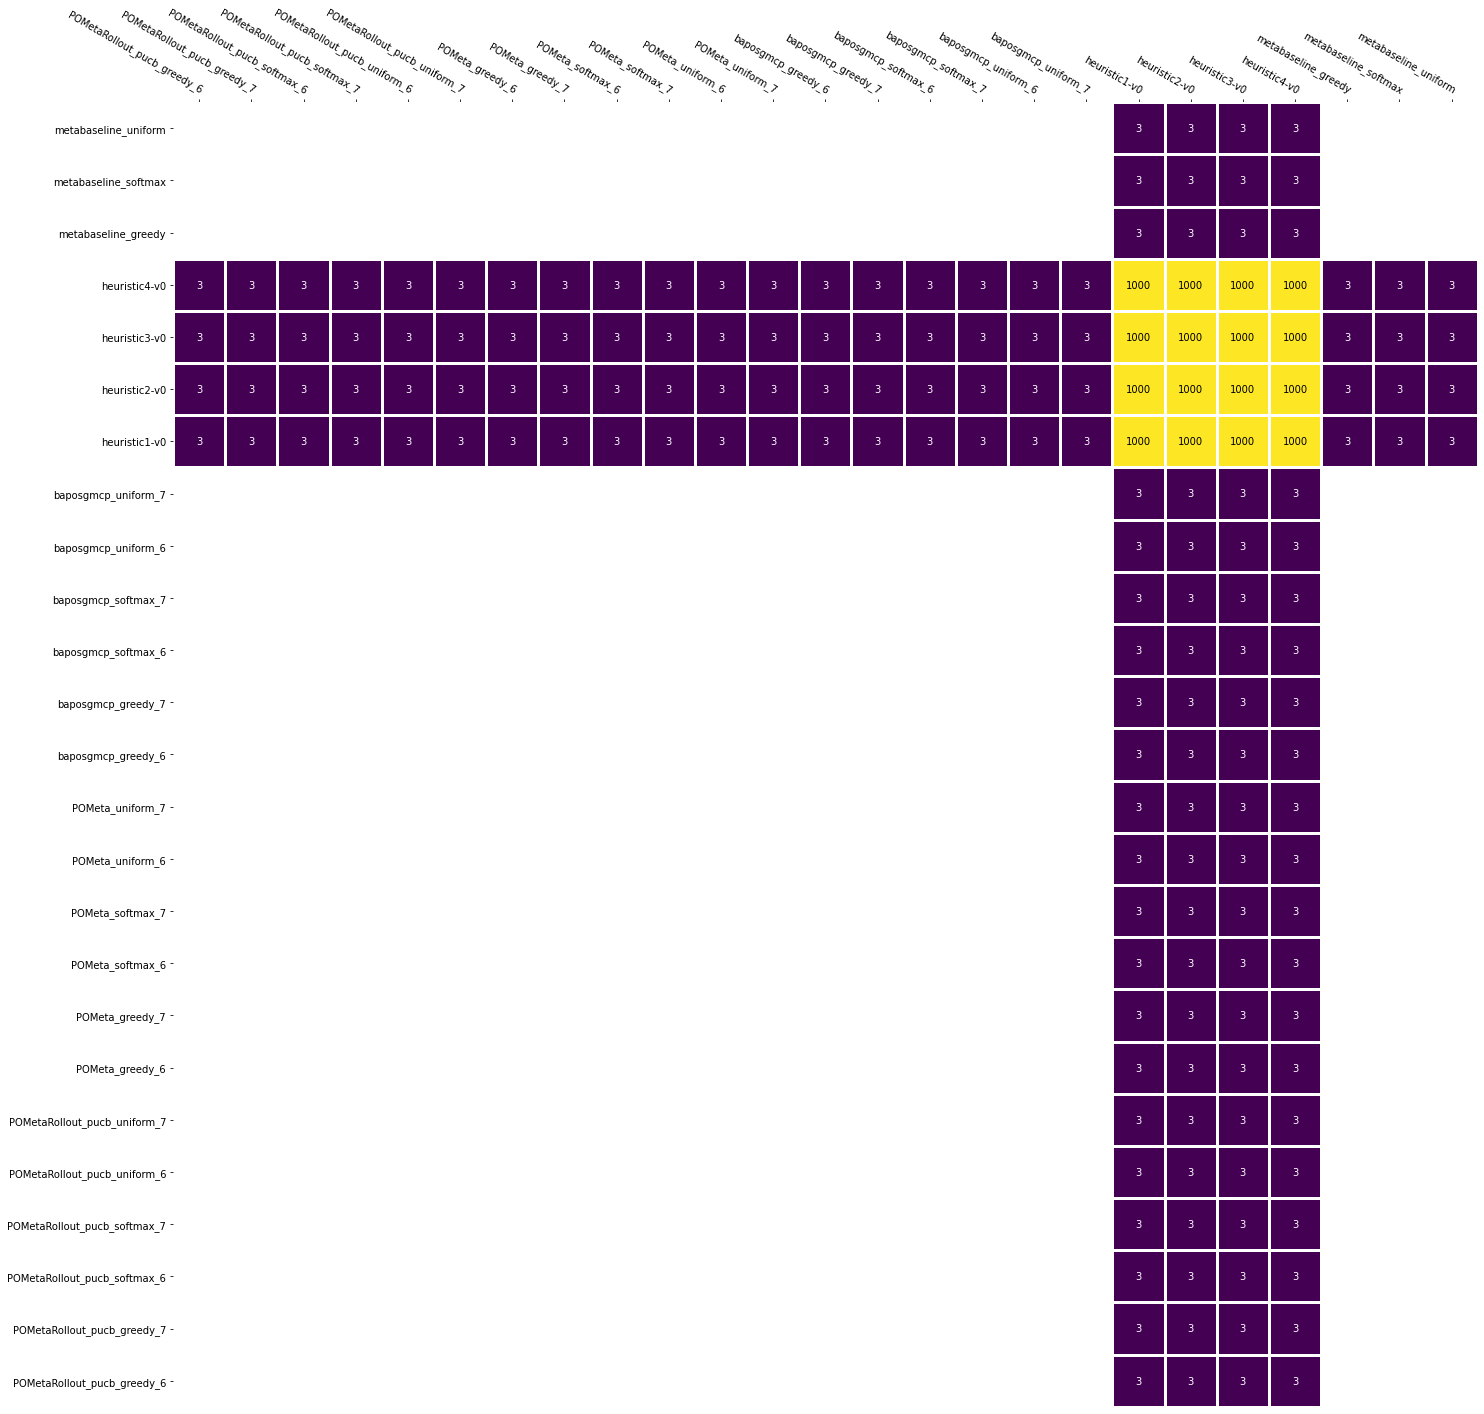

In [8]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="num_episodes", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(24, 24), 
    valfmt="{x:.0f}",
    average_duplicates=True,
    duplicate_warning=False
)

## Policy Prior Performance

Here we look at the expected performance against the policy prior of BAPOSGMCP.

In [9]:
policy_prior = {1: {
    "heuristic1-v0": 1/4,
    "heuristic2-v0": 1/4,
    "heuristic3-v0": 1/4,
    "heuristic4-v0": 1/4
}}

# Plot via num sims
policies_with_sims = [
    "POMetaRollout_pucb_greedy",
    "POMetaRollout_pucb_softmax",
    "POMetaRollout_pucb_uniform",
    "POMeta_greedy",
    "POMeta_softmax",
    "POMeta_uniform"
    "baposgmcp_greedy",
    "baposgmcp_softmax",
    "baposgmcp_uniform"
]

policies_without_sims = [
    "metabaseline_greedy",
    "metabaseline_softmax",
    "metabaseline_uniform",
]

In [11]:
expected_mean_returns_values, expected_mean_returns_err_values, policy_ids = plot_utils.get_expected_values_by_prior(
    combined_df,
    y_key="episode_returns_mean",
    y_err_key="episode_returns_CI",
    policy_key="policy_id",
    policy_prior=policy_prior
)
for i, policy_id in enumerate(policy_ids):
    value = expected_mean_returns_values[i]
    err_value = expected_mean_returns_err_values[i]
    print(f"{policy_id} = {value:.2f} +/- {err_value:.2f}")

POMetaRollout_pucb_greedy_6 = 0.46 +/- 0.24
POMetaRollout_pucb_greedy_7 = 0.60 +/- 0.48
POMetaRollout_pucb_softmax_6 = 0.46 +/- 0.31
POMetaRollout_pucb_softmax_7 = 0.66 +/- 0.40
POMetaRollout_pucb_uniform_6 = 0.34 +/- 0.27
POMetaRollout_pucb_uniform_7 = 0.55 +/- 0.50
POMeta_greedy_6 = 0.64 +/- 0.26
POMeta_greedy_7 = 0.68 +/- 0.49
POMeta_softmax_6 = 0.57 +/- 0.23
POMeta_softmax_7 = 0.68 +/- 0.41
POMeta_uniform_6 = 0.57 +/- 0.23
POMeta_uniform_7 = 0.57 +/- 0.52
baposgmcp_greedy_6 = 0.60 +/- 0.34
baposgmcp_greedy_7 = 0.63 +/- 0.43
baposgmcp_softmax_6 = 0.47 +/- 0.16
baposgmcp_softmax_7 = 0.60 +/- 0.48
baposgmcp_uniform_6 = 0.47 +/- 0.14
baposgmcp_uniform_7 = 0.63 +/- 0.46
heuristic1-v0 = 0.60 +/- 0.02
heuristic2-v0 = 0.42 +/- 0.02
heuristic3-v0 = 0.47 +/- 0.02
heuristic4-v0 = 0.36 +/- 0.02
metabaseline_greedy = 0.72 +/- 0.06
metabaseline_softmax = 0.73 +/- 0.07
metabaseline_uniform = 0.49 +/- 0.23


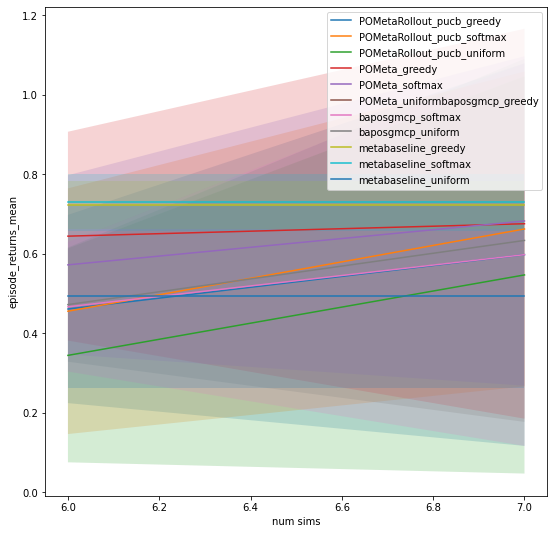

In [12]:
plot_utils.plot_expected_values_by_num_sims(
    y_key="episode_returns_mean",
    expected_values=expected_mean_returns_values,
    expected_err_values=expected_mean_returns_err_values,
    policy_ids=policy_ids,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

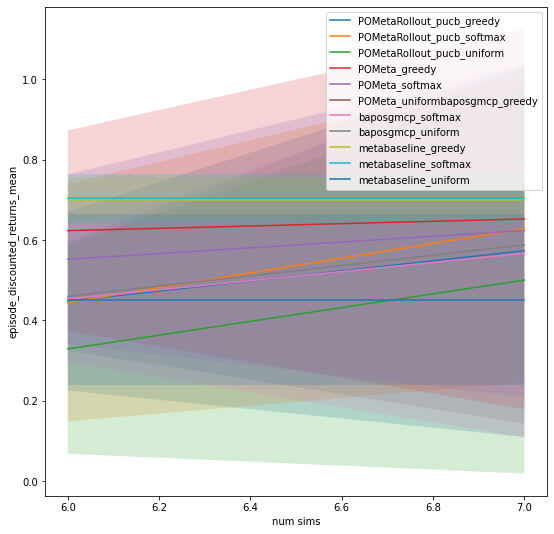

In [13]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_discounted_returns_mean",
    y_err_key="episode_discounted_returns_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

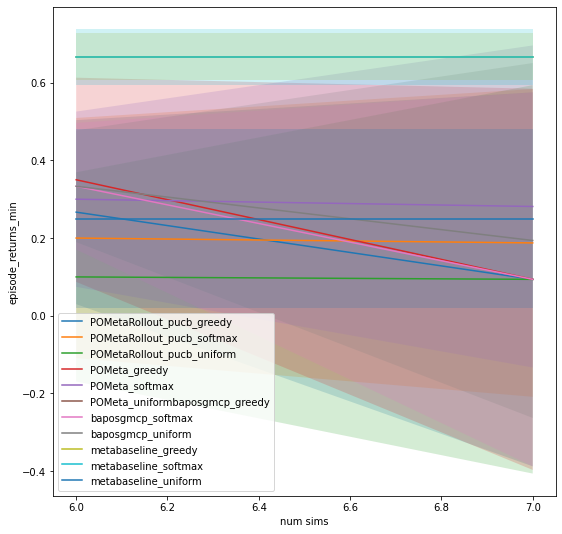

In [14]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_returns_min",
    y_err_key="episode_returns_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

## Looking at time

   - episode_steps
   - search_time
   - update_time
   - reinvigoration_time
   - policy_calls
   - inference_time
   - search_depth

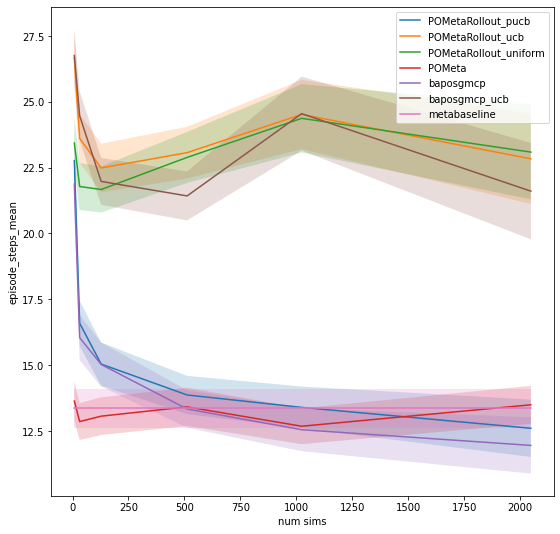

In [49]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_steps_mean",
    y_err_key="episode_steps_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

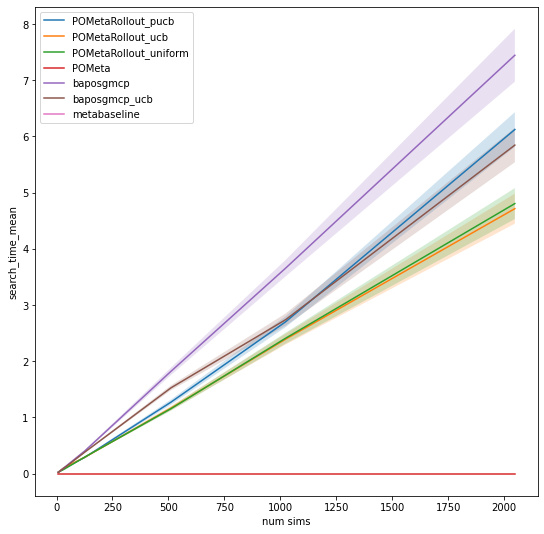

In [44]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="search_time_mean",
    y_err_key="search_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

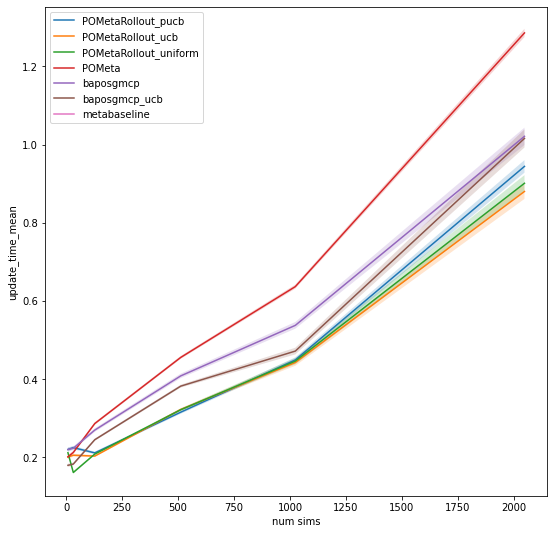

In [45]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="update_time_mean",
    y_err_key="update_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

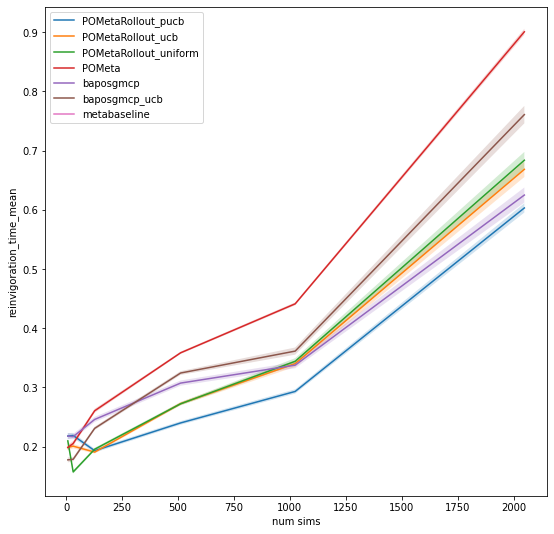

In [46]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="reinvigoration_time_mean",
    y_err_key="reinvigoration_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

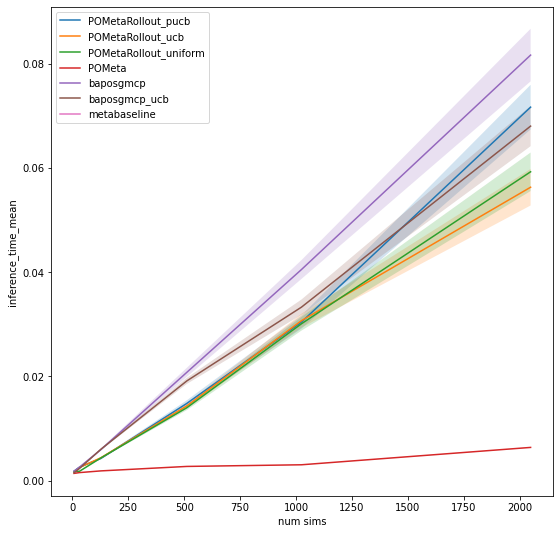

In [47]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="inference_time_mean",
    y_err_key="inference_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

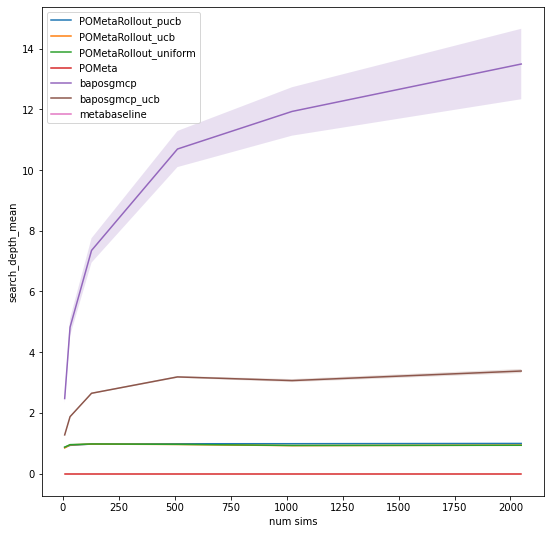

In [48]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="search_depth_mean",
    y_err_key="search_depth_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)